- Author   -  Saurav vara prasad Channuri

- Roll No -  ES16BTECH11007

- cross - correlation










In [0]:
import numpy as np
import scipy.misc as sp
from skimage import io
from scipy import ndimage as nd
import matplotlib
import scipy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
real_image = io.imread("einstein.jpg")

real_image_grey = io.imread('einstein.jpg', as_gray=True)


In [57]:
fillter = np.empty([3,3,screenshot.shape[2]])
print "real image shape = ", real_image.shape
print "screenshot shape = ", screenshot.shape

real image shape =  (505, 624, 3)
screenshot shape =  (192, 124, 4)


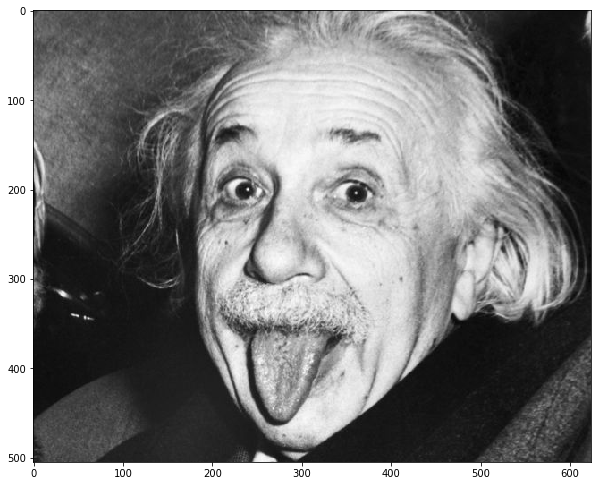

In [59]:
plt.imshow(real_image)

scipy.signal.correlate2d(real_image_grey, screenshot_grey, mode='same')

In [0]:
def pad( image, template, padding_mode ):
    
    if(padding_mode == "edge"):
      top = image[0]
      top = np.tile(top, (template.shape[0]/2, 1))
      image = np.vstack((top, image)) # top padding

      bottom = image[-1]
      bottom = np.tile(bottom,(template.shape[0]/2, 1))
      image = np.vstack((image, top)) # Botton padding


      left = image.T[0]
      left = np.tile(left, (template.shape[1]/2, 1))
      image = np.vstack((left, image.T)).T   # left padding

      right = image.T[-1]
      right = np.tile(right, (template.shape[1]/2, 1))
      image = np.vstack((image.T, right)).T  # right padding

    elif(padding_mode == "wrap"):
      top = image[image.shape[0]-(template.shape[0]/2) : , :]
      image = np.vstack((top, image))
      
      bottom = image[:template.shape[0]/2, :]
      image = np.vstack((image, bottom))
      
      left = image[: , image.shape[1] - (template.shape[1]/2): ]
      image = np.vstack((left.T, image.T)).T
      
      right = image[:, :template.shape[1]/2]
      image = np.vstack((image.T, right.T)).T
      
    return image
    
    

In [0]:
def plot(image, template, corr_output, corr, padded):
  
  # for adjusting the display figure size
  matplotlib.rcParams['figure.figsize'] = [10, 10]
  matplotlib.rcParams.update({'font.size': 10})

  # plotting images in a grid
  y, x = np.unravel_index(np.argmax(corr_output), corr.shape) 

  fig, ([[ax_orig, ax_template ],
         [ax_corr, ax_corr_norm],
         [ax_pad , ax_edge     ]]) = plt.subplots(3, 2)

  # plotting real image
  ax_orig.imshow(image, cmap = 'gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()

  # plotting correlation output
  ax_template.imshow(template, cmap = 'gray')
  ax_template.set_title('kernel')
  ax_template.set_axis_off()

  #plotting the edges to show that correlation is working
  ax_corr.imshow(corr, cmap = 'gray')
  ax_corr.set_title('real convolution output')
  ax_corr.set_axis_off()

  #plotting cross correlation output with normalization
  ax_corr_norm.imshow(corr_output, cmap = 'gray')
  ax_corr_norm.set_title('expected convolution output')
  ax_corr_norm.set_axis_off()

  #plotting cross correlation output with normalization
  ax_pad.imshow(padded, cmap = 'gray')
  ax_pad.set_title('original padded output')
  ax_pad.set_axis_off()
  
  #plotting cross correlation output with normalization
  ax_edge.imshow(corr_output - corr, cmap = 'gray')
  ax_edge.set_title('real & generated output difference')
  ax_edge.set_axis_off()

#   ax_orig.plot(x, y, 'ro', linewidth = 100)
#   ax_corr.plot(x, y, 'ro', linewidth = 100)
#   ax_corr_norm.plot(x, y, 'ro', linewidth = 100)

  fig.show()

In [0]:
def convolution(data):
  image    = data["image"]
  template = data["kernel"]
  padding_mode  = data["padding"]
  
  
  padded = pad(image, template, padding_mode)
  corr_output = np.empty(image.shape)

  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          temp_matrix = padded[i:i+template.shape[0] , j:j+template.shape[1]]
          corr_output[i][j] = np.sum(template*temp_matrix)
  
  return corr_output, padded

In [0]:
def invert(template):
 
  inverted = np.empty(template.shape)

  for i in range(template.shape[0]):
    for j in range(template.shape[1]):
      inverted[-i-1, -j-1] = template[i,j]
      
  return inverted

In [0]:
def convolve(data):
  
  image = data["image"]
  kernel = data["kernel"]
  template = invert(kernel)

  
  convolve_output, padded    = convolution(data)
  
  convolve                   = scipy.signal.convolve2d(image,
                                                       kernel,
                                                       boundary='symm',
                                                       mode='same')
  print "convolution done \n"
  
  plot(image, kernel, convolve, convolve_output, padded)
  print "plots done"
  print "____________________________________________________________\n"
  

convolution done 

plots done
____________________________________________________________



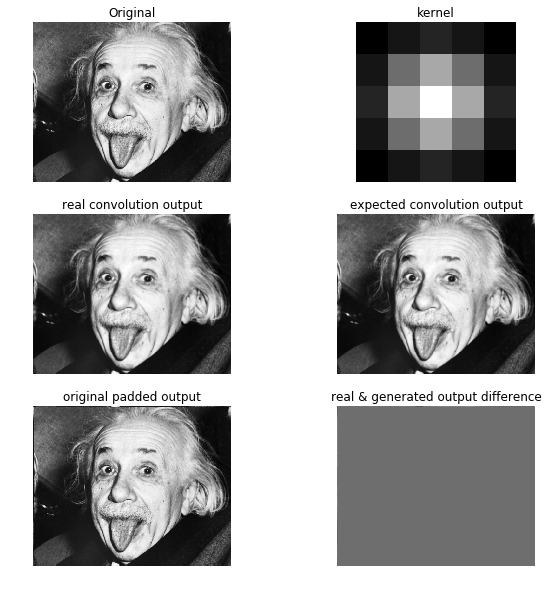

In [171]:
kernel  = np.array([[1,  4,  6,  4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1,  4,  6,  4, 1]]) * (1.0/256)


data = {
          "image"   : real_image_grey,
          "kernel"  : kernel,
          "padding" : "wrap"
    
       }

convolve(data)